In [41]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Settled Locations

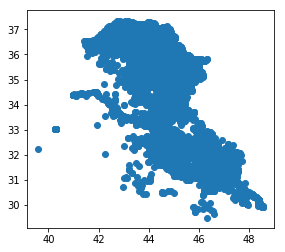

In [73]:
iq_locations = gpd.read_file('data/settled_locations/irq_pplp_ocha_20140722.shp')
iq_locations.plot()

In [157]:
iq_locations.head()

,PCode,PNameEn,PNameAr,Longitude,Latitude,PCodeAlt1,PNameAlt1,A1Code,A1NameEn,A2Code,A2NameEn,geometry
0,IQ-P00001,Al 'Bor (Shishan),حي العبور,41.977818,34.369352,110013.0,Al 'bor (Shishan),IQ-G01,Anbar,IQ-D001,Ana,POINT (41.977818 34.369352)
1,IQ-P00002,Al Ma'adid,المعاضيد,42.145227,34.226544,110011.0,Al ma'adid,IQ-G01,Anbar,IQ-D001,Ana,POINT (42.145227 34.226544)
2,IQ-P00003,Al Tadamon,حي التضامن,41.972490,34.367327,110017.0,Al Tadamon,IQ-G01,Anbar,IQ-D001,Ana,POINT (41.97249 34.367327)
3,IQ-P00004,Al-A'Wany Village,قرية العواني,41.987483,34.373356,110318.0,Al-A'wany Village,IQ-G01,Anbar,IQ-D001,Ana,POINT (41.987483 34.373356)
4,IQ-P00005,Al-Hasa Complex,,41.789831,34.493056,110021.0,Al-Hasa Complex,IQ-G01,Anbar,IQ-D001,Ana,POINT (41.789831 34.493056)


In [74]:
iq_locations.dissolve(by='A1NameEn').head()

,geometry,PCode,PNameEn,PNameAr,Longitude,Latitude,PCodeAlt1,PNameAlt1,A1Code,A2Code,A2NameEn
A1NameEn,,,,,,,,,,,
Anbar,"(POINT (39.6 32.25), POINT (40.277075 33.03895...",IQ-P00001,Al 'Bor (Shishan),حي العبور,41.977818,34.369352,110013.0,Al 'bor (Shishan),IQ-G01,IQ-D001,Ana
Babylon,"(POINT (43.85416667 34.18277778), POINT (44.02...",IQ-P07068,Abas al-Yasien,,44.814167,32.165278,609670.0,Abas al-yasien,IQ-G06,IQ-D034,Hashimiya
Baghdad,"(POINT (43.98 33.16), POINT (44.02 33.18), POI...",IQ-P08154,1 Athar,1 اذار,44.177778,33.301944,767166.0,1 Athar,IQ-G07,IQ-D038,Abu Ghraib
Basrah,"(POINT (44.312482 31.989749), POINT (47.15 30....",IQ-P00557,Aal Abrahim (Electricity Project),,47.981944,30.455556,205258.0,Aal abrahim (electricy project),IQ-G02,IQ-D009,Abu Al-Khaseeb
Dahuk,"(POINT (42.337 37.0673), POINT (42.365 37.091)...",IQ-P09807,11 Athar,,43.337300,37.048800,811917.0,11 Athar,IQ-G08,IQ-D048,Amedi


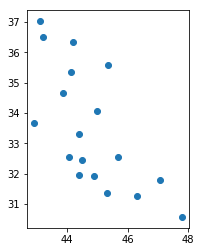

In [88]:
iq_locations_diss = iq_locations.dissolve(by='A1NameEn')
geo = iq_locations_diss.geometry.centroid
iq_locations_diss['geometry'] = geo
iq_locations_diss.plot()

In [89]:
iq_locations_diss.head()

,geometry,PCode,PNameEn,PNameAr,Longitude,Latitude,PCodeAlt1,PNameAlt1,A1Code,A2Code,A2NameEn
A1NameEn,,,,,,,,,,,
Anbar,POINT (42.93260091977069 33.6574294717202),IQ-P00001,Al 'Bor (Shishan),حي العبور,41.977818,34.369352,110013.0,Al 'bor (Shishan),IQ-G01,IQ-D001,Ana
Babylon,POINT (44.48791680170388 32.44899212777464),IQ-P07068,Abas al-Yasien,,44.814167,32.165278,609670.0,Abas al-yasien,IQ-G06,IQ-D034,Hashimiya
Baghdad,POINT (44.38721834876608 33.31903306523653),IQ-P08154,1 Athar,1 اذار,44.177778,33.301944,767166.0,1 Athar,IQ-G07,IQ-D038,Abu Ghraib
Basrah,POINT (47.7870157225835 30.55455170791643),IQ-P00557,Aal Abrahim (Electricity Project),,47.981944,30.455556,205258.0,Aal abrahim (electricy project),IQ-G02,IQ-D009,Abu Al-Khaseeb
Dahuk,POINT (43.11365751758269 37.04526998172793),IQ-P09807,11 Athar,,43.337300,37.048800,811917.0,11 Athar,IQ-G08,IQ-D048,Amedi


# Districts

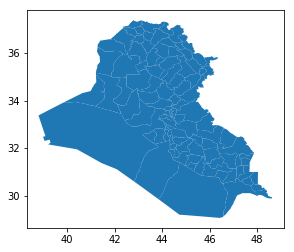

In [42]:
iq_districts = gpd.read_file('data/Iraq_Districts/iraq_districts.shp')
iq_districts.plot()

In [43]:
iq_districts_centroids = iq_districts.centroid

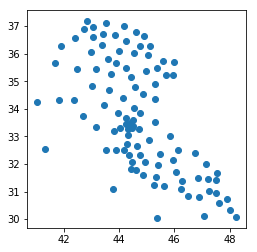

In [44]:
iq_districts_centroids.plot()

In [45]:
iq_districts['geometry'] = iq_districts_centroids

In [46]:
iq_districts.head()

,OBJECTID,ADM3NAME,ADM3CODE,ADM2NAME,ADM2CODE,AREA_KM2,PERIM_KM,geometry
0,1,Al-Shikhan,iq15053,Ninewa,iq15,1304.477640,185.494463,POINT (43.40346235506792 36.72056301616691)
1,2,Tilkaif,iq15100,Ninewa,iq15,1247.191304,168.651504,POINT (43.03342539954171 36.58669739348522)
2,3,Al-Hamdaniya,iq15017,Ninewa,iq15,1785.729624,220.723098,POINT (43.38695416605427 36.3001746982245)
3,4,Mosul,iq15038,Ninewa,iq15,4335.375726,420.809044,POINT (42.96764284731583 36.06869587364601)
4,5,Telafar,iq15098,Ninewa,iq15,4460.156834,424.953377,POINT (42.40816811654253 36.58223684594847)


# Distance between district centroids, polygons

In [86]:
iq_locations_diss.reset_index().head()

,A1NameEn,geometry,PCode,PNameEn,PNameAr,Longitude,Latitude,PCodeAlt1,PNameAlt1,A1Code,A2Code,A2NameEn
0,Anbar,"POLYGON ((43.0125 31.068333, 39.6 32.25, 40.97...",IQ-P00001,Al 'Bor (Shishan),حي العبور,41.977818,34.369352,110013.0,Al 'bor (Shishan),IQ-G01,IQ-D001,Ana
1,Babylon,"POLYGON ((44.754722 32.122222, 44.36 32.15, 44...",IQ-P07068,Abas al-Yasien,,44.814167,32.165278,609670.0,Abas al-yasien,IQ-G06,IQ-D034,Hashimiya
2,Baghdad,"POLYGON ((47.2138 30.9353, 44.18 32.99, 43.98 ...",IQ-P08154,1 Athar,1 اذار,44.177778,33.301944,767166.0,1 Athar,IQ-G07,IQ-D038,Abu Ghraib
3,Basrah,"POLYGON ((48.53 29.91, 47.938333 30.015278, 47...",IQ-P00557,Aal Abrahim (Electricity Project),,47.981944,30.455556,205258.0,Aal abrahim (electricy project),IQ-G02,IQ-D009,Abu Al-Khaseeb
4,Dahuk,"POLYGON ((42.5851 36.3719, 42.337 37.0673, 42....",IQ-P09807,11 Athar,,43.337300,37.048800,811917.0,11 Athar,IQ-G08,IQ-D048,Amedi


In [90]:
dist_iq_locations = iq_locations_diss.reset_index().copy()
trips = set()
count = 0
with open("data/routes_admin1.csv", "w") as f:
    #f.write(",".join(["name1", "name2", "distance\n"]))
    for i in dist_iq_locations.itertuples():
        dists = dist_iq_locations.geometry.distance(i.geometry) * 1000
        dists = [int(round(i,0)) for i in dists]
        tups = zip(dist_iq_locations.A1NameEn, dists)
        for destination, time in tups:
            key = (i.A1NameEn, destination)
            if key[0] == key[1]:
                continue
            if key not in trips:
                trips.add(key)
                trips.add((key[1], key[0]))
                f.write(",".join([key[0], key[1], str(time)]) + "\n")
                if key[0] != key[1]:
                    f.write(",".join([key[1], key[0], str(time)]) + "\n")
                    

In [119]:
dist_iq_locations.shape

(18, 12)

# take observed pops as baseline


In [92]:
# first read in populated locations and polygonize them
iq_locations = gpd.read_file('data/settled_locations/irq_pplp_ocha_20140722.shp')
iq_locations_diss = iq_locations.dissolve(by='A1NameEn')
geo = iq_locations_diss.geometry.convex_hull
iq_locations_diss['geometry'] = geo

df = pd.read_csv('iom_dtm_reports/d89.csv', usecols = ['Latitude', 'Longitude', 'Families', 'Individuals', 'District'])
points = [Point(x,y) for x, y in zip(df.Longitude, df.Latitude)]
df = gpd.GeoDataFrame(df)
df['geometry'] = points

In [72]:
df = df[['District', 'geometry', 'Families', 'Individuals']]
df_dissolve = df.dissolve(by = 'District', aggfunc='sum')
df_dissolve_poly = df_dissolve.copy()
df_dissolve_poly.geometry = df_dissolve.geometry.convex_hull
df_dissolve_centroids = df_dissolve.copy()
df_dissolve_centroids.geometry = df_dissolve.geometry.centroid
df_dissolve_centroids.shape

(102, 3)

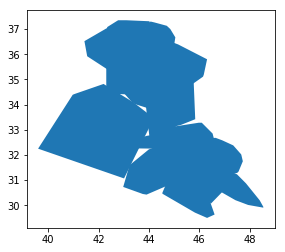

In [94]:
iq_locations_diss.plot() # here are the bins

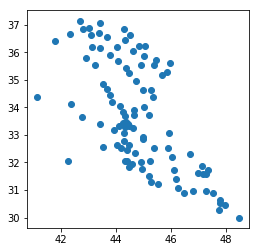

In [93]:
df_dissolve_centroids.plot() # here are the points

In [111]:
iq_locs_w_pop = gpd.sjoin(iq_locations_diss, df_dissolve_centroids).reset_index()
iq_locs_w_pop = iq_locs_w_pop.dissolve('index', aggfunc = 'sum')
iq_locs_w_pop = iq_locs_w_pop.reset_index()
iq_locs_w_pop.head()

,index,geometry,Longitude,Latitude,PCodeAlt1,Families,Individuals
0,Anbar,"POLYGON ((43.0125 31.068333, 39.6 32.25, 40.97...",335.822544,274.954816,880104.0,19326,115956
1,Babylon,"POLYGON ((44.754722 32.122222, 44.36 32.15, 44...",761.840839,546.809726,10364390.0,35902,215412
2,Baghdad,"POLYGON ((47.2138 30.9353, 44.18 32.99, 43.98 ...",618.488892,466.227216,10740324.0,27052,162312
3,Basrah,"POLYGON ((48.53 29.91, 47.938333 30.015278, 47...",623.765272,395.922228,2668354.0,2672,16032
4,Dahuk,"POLYGON ((42.5851 36.3719, 42.337 37.0673, 42....",260.023800,222.292800,4871502.0,74180,445080


In [116]:
# now extract name, lat,lon, families and individual # 
location_csv = pd.DataFrame()
location_csv['name'] = iq_locs_w_pop['index']

geoms = iq_locs_w_pop.centroid
location_csv['lat'] = [i.y for i in geoms]
location_csv['lon'] = [i.x for i in geoms]
location_csv['pop'] = iq_locs_w_pop['Families']

In [117]:
location_csv.head()

,name,lat,lon,pop
0,Anbar,32.960017,42.027628,19326
1,Babylon,33.001010,44.446212,35902
2,Baghdad,32.644376,45.172064,27052
3,Basrah,30.954440,46.825362,2672
4,Dahuk,36.946415,43.097581,74180


In [168]:
location_csv.to_csv('data/location_values_init.csv', header = False, index = False)

# find conflict spots

In [198]:
conflict_loc = pd.read_csv('data/acled_unprocessed_conflict_locations.csv')
conflict_loc = conflict_loc[conflict_loc['fatalities'] > 0]
conflict_loc_geo = gpd.GeoDataFrame(conflict_loc)
points = [Point(float(j), float(i)) for i, j in zip(conflict_loc.latitude, conflict_loc.longitude)]
conflict_loc_geo.geometry = points

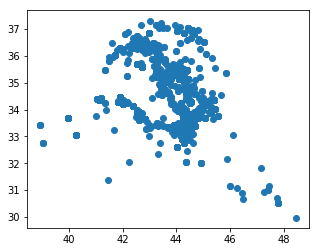

In [139]:
conflict_loc_geo.plot()

In [199]:
conflict_loc_geo = conflict_loc_geo.sort_values('event_date')

def assign_round(x):
    new_x = int(x[:4] + x[5:7] + x[8:])
    start = 20170101
    # from http://iraqdtm.iom.int/IDPsML.aspx
    upper_dates = [20170105, 20170119, 20170202, 20170216, 
                  20170302, 20170316, 20170330, 20170413, 
                  20170427, 20170515, 20170530, 20170615,
                  20170630, 20170715, 20170730, 20170815,
                  20170830, 20170915, 20170930, 20171015, 
                  20171031, 20171115, 20171129, 20171215,
                  20171231,
                  20180115,20180131, 20180215, 20180228, 
                  20180315, 20180330, 20180415, 20180430,
                  ]
    top_val = len(upper_dates)
    offset = len(upper_dates)
    
    for i in upper_dates:
        if new_x > i:
            offset -= 1
            start = i
        else:
            return top_val - offset

conflict_loc_geo['round'] =  conflict_loc_geo.event_date.apply(assign_round)
        
conflict_loc_geo[conflict_loc_geo['round'] == 0].shape


(61, 33)

In [200]:
locs = gpd.sjoin(iq_locs_w_pop, conflict_loc_geo).reset_index()
locs = locs[['index', 'round']]
locs.columns =['name', 'round']
locs.to_csv('data/conflict_locations_by_round.csv')

In [203]:
locs[locs['round'] == 0]

,name,round
166,Anbar,0
187,Anbar,0
507,Anbar,0
514,Anbar,0
752,Babylon,0
753,Baghdad,0
975,Babylon,0
976,Baghdad,0
977,Diyala,0
1221,Babylon,0


In [184]:
all_locs = set()
for i in conflict_locations.values():
    for j in i:
        all_locs.add(j[:3])
for i in conflict_locations.items():
    

{'Sul', 'Kir', 'Bag', 'Erb', 'Mis', 'Dah', 'Thi', 'Anb', 'Bas', 'Was', 'Diy', 'Naj', 'Bab', 'Ker', 'Sal', 'Qad', 'Nin'}


'for i in conflict_locations.items():\n    print(i)'

# Assemble location data and save to its respective csv

In [388]:
'''# use df_dissolve_centroids
for i in set(conflict_locations['round']):
    x = gpd.sjoin(df_dissolve_centroids, conflict_locations[conflict_locations['round'] == i], 'left').reset_index().fillna("MISSING")
    locations_csv = pd.DataFrame()
    locations_csv['lat'] = [i.y for i in x.geometry]
    locations_csv['lon'] = [i.x for i in x.geometry]
    locations_csv['name'] = x['index']
    locations_csv['pop'] = x['Families']
    locations_csv['region'] = 'Middle East'
    locations_csv['country'] = 'Iraq'
    locations_csv['conflict_date'] = i
    locations_csv['ind_pop'] = x['Individuals']
    type_place = []
    for j in x.itertuples():
        if j.index_right == "MISSING":
            type_place.append('camp')
        else:
            type_place.append('conflict')
    locations_csv['location_type'] = type_place
    locations_csv.to_csv('flee-release/location_data/locations_csv'+str(i)+".csv", header = False, index = False)'''

In [59]:
x = gpd.sjoin(df_dissolve_centroids, conflict_locations, 'left').reset_index().fillna("MISSING")
x = x.dissolve('index', aggfunc = ).reset_index()

locations_csv = pd.DataFrame()
locations_csv['lat'] = [i.y for i in x.geometry]
locations_csv['lon'] = [i.x for i in x.geometry]
locations_csv['name'] = x['index']
locations_csv['pop'] = x['Families']
locations_csv['region'] = 'Middle East'
locations_csv['country'] = 'Iraq'
locations_csv['conflict_date'] = x['round']
locations_csv['ind_pop'] = x['Individuals']
type_place = []
for j in x.itertuples():
    if j.index_right == "MISSING":
        type_place.append('camp')
    else:
        type_place.append('town')
locations_csv['location_type'] = type_place
locations_csv.to_csv('data/locations_csv_full.csv', header = False, index = False)

In [58]:
locations_csv.head()

,lat,lon,name,pop,region,country,conflict_date,ind_pop,location_type
0,30.452122,47.950556,Abu Al-Khaseeb,222,Middle East,Iraq,23,1332,conflict
1,33.307252,44.102076,Abu Ghraib,3959,Middle East,Iraq,5,23754,conflict
2,33.458519,44.381896,Adhamia,2534,Middle East,Iraq,5,15204,conflict
3,32.043651,45.240009,Afaq,334,Middle East,Iraq,22,2004,conflict
4,32.554836,43.537363,Ain Al-Tamur,38,Middle East,Iraq,15,228,conflict


# distance between all dissolved centroids

In [433]:
dist_iq_locations = df_dissolve_centroids.reset_index().copy()
dist_iq_locations.columns = ['name', 'geometry', 'Families', 'Individuals']

trips = set()
count = 0
with open("flee-release/routes.csv", "w") as f:
    #f.write(",".join(["name1", "name2", "distance\n"]))
    for i in dist_iq_locations.itertuples():
        dists = dist_iq_locations.geometry.distance(i.geometry) * 1000
        dists = [int(round(i,0)) for i in dists]
        tups = zip(dist_iq_locations.name, dists)
        for destination, time in tups:
            key = (i.name, destination)
            if key[0] == key[1]:
                continue
            if key not in trips:
                trips.add(key)
                trips.add((key[1], key[0]))
                f.write(",".join([key[0], key[1], str(time)]) + "\n")
                if key[0] != key[1]:
                    f.write(",".join([key[1], key[0], str(time)]) + "\n")
dist_iq_locations.to_file('locations_geodata.shp')

In [413]:
conflict_locations.head()

,round,geometry,Unnamed: 0,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
index_right,,,,,,,,,,,,,,,,,,,,,
0,0,(POLYGON ((43.52066757300617 33.20927950748511...,6354,1436275.0,368,IRQ16,16.0,2017-01-01,2017.0,1.0,...,Telafar,36.3809,42.4674,1.0,ISIS Live Map,Other-local,"01 Jan 2017, ISIS attacked and burned position...",0,1.524054e+09,IRQ
1,1,"(POLYGON ((48.0975 30.533, 48.09605541800166 3...",6248,1435318.0,368,IRQ88,88.0,2017-01-06,2017.0,1.0,...,Al Karabilah,34.3770,41.0544,1.0,Airwars,Other-local,"On Jan 6th, the global coalition and Iraqi for...",9,1.524054e+09,IRQ
2,2,"(POLYGON ((48.7731 29.9742, 48.77165541800166 ...",6022,1432282.0,368,IRQ319,319.0,2017-01-20,2017.0,1.0,...,Abu Ghraib,33.2919,44.0692,2.0,Al-Maalomah (Arabic),Subnational,"On Jan 20, 4 civilians were injured by an IED ...",0,1.524054e+09,IRQ
3,3,"(POLYGON ((48.0804 30.5085, 48.07895541800166 ...",5824,1578020.0,368,IRQ532,532.0,2017-02-03,2017.0,1.0,...,Makhol,35.2019,43.2723,2.0,The Baghdad Post,National,"On Feb 03, several of the Iran Militias in Ira...",10,1.524522e+09,IRQ
4,4,"(POLYGON ((46.4203 33.0594, 46.41885541800166 ...",5650,1426604.0,368,IRQ703,703.0,2017-02-17,2017.0,1.0,...,Haweeja,35.3271,43.7694,2.0,Basnews,Subnational,"On Feb 17, global coalition airstrike's target...",20,1.524054e+09,IRQ


In [434]:
dist_iq_locations.head()

,name,geometry,Families,Individuals
0,Abu Al-Khaseeb,POINT (47.95055627906665 30.45212203436363),222,1332
1,Abu Ghraib,POINT (44.10207648008262 33.30725164591957),3959,23754
2,Adhamia,POINT (44.38189573484045 33.45851885876179),2534,15204
3,Afaq,POINT (45.24000918569211 32.04365122221843),334,2004
4,Ain Al-Tamur,POINT (43.537363344 32.554835686),38,228


# Actual observed pops

In [211]:
# first read in known populated locations and polygonize them
iq_locations = gpd.read_file('data/settled_locations/irq_pplp_ocha_20140722.shp')
iq_locations_diss = iq_locations.dissolve(by='A1NameEn')
geo = iq_locations_diss.geometry.convex_hull
iq_locations_diss['geometry'] = geo

location_csv = pd.DataFrame()
location_csv['name'] = iq_locs_w_pop['index']

import os

iom_reports = os.listdir('iom_dtm_reports')
for i in range(len(iom_reports)):
    df = pd.read_csv('iom_dtm_reports/' + iom_reports[i], usecols = ['Latitude', 'Longitude', 'Families', 'Individuals', 'District'])
    points = [Point(x,y) for x, y in zip(df.Longitude, df.Latitude)]
    df = gpd.GeoDataFrame(df)
    df['geometry'] = points
    
    df = df[['District', 'geometry', 'Families', 'Individuals']]
    df_dissolve = df.dissolve(by = 'District', aggfunc='sum')
    df_dissolve_poly = df_dissolve.copy()
    df_dissolve_poly.geometry = df_dissolve.geometry.convex_hull
    df_dissolve_centroids = df_dissolve.copy()
    df_dissolve_centroids.geometry = df_dissolve.geometry.centroid
    
    iq_locs_w_pop = gpd.sjoin(iq_locations_diss, df_dissolve_centroids).reset_index()
    iq_locs_w_pop = iq_locs_w_pop.dissolve('index', aggfunc = 'sum')
    iq_locs_w_pop = iq_locs_w_pop.reset_index()

    geoms = iq_locs_w_pop.centroid
    location_csv['pop' + str(i)] = iq_locs_w_pop['Families']
    location_csv.fillna(0, inplace = True)

In [212]:
location_csv.T.to_csv('truth_vals.csv', header = False, index = False)

In [222]:
ddd = pd.read_csv('truth_vals.csv', skiprows = 1, header = None)

In [238]:
ddd.T.sum()

0     682312.0
1     700039.0
2     719647.0
3     709791.0
4     613183.0
5     779484.0
6     790948.0
7     641345.0
8     740259.0
9     748560.0
10    740845.0
11    726587.0
12    642678.0
13    779430.0
14    810908.0
15    656585.0
dtype: float64